# Import Data

For this purpose, this strategy will attemp to trade 3 instruments

1. AUDUSD H4 - Liquid, Low Volatility
1. AUDUSD D1 - Liquid, Low Volatility
1. EURUSD H4 - Liquid, Mid Volatility
1. EURUSD D1 - Liquid, Mid Volatility
1. GBPUSD H4 - Liquid, Extreme Volatility
1. GBPUSD D1 - Liquid, High Volatility
1. Wirdcard D1 - Illiquid, High Volatility

## AUDUSD D1


In [1]:

import pandas as pd
import import_ipynb
from strategy_sv import TradeStrategySV

forex_symbol = "AUDUSD"

forex_df = pd.read_csv('../../data/gen/{}_Daily_df.csv'.format(forex_symbol),
                       parse_dates=True,
                       index_col=0)
# Strip whitespace from column names
forex_df.columns = forex_df.columns.str.strip()

# Trading Parameters
lots = 1 
leverage = 400 # 400 Leverage
margin = 0.1 # 10% Margin Interest
pip_cost = 0.8 # Transaction Cost 0.8 pip
stop_loss = 2.0 # Stop Loss at 2.0 of standard deviation (so 5%)
one_trade_week = 5
one_trade_month = one_trade_week * 4
two_trade_month = one_trade_month * 2
three_trade_month = one_trade_month * 3
half_trade_year = three_trade_month * 2
one_trade_year = half_trade_year * 2

buy_slope_threshold = 0.00011578947368419412 
buy_velocity_threshold = -0.01695000000000002
close_slope_threshold = 0.017273684210526295
close_velocity_threshold = 0.018381578947368395
sell_slope_threshold = -0.00011578947368419412
sell_velocity_threshold = 0.01695000000000002 

# Initialize Strategy
strategy = TradeStrategySV(leverage=leverage,
                           margin=margin,
                           pip_cost=pip_cost,
                           buy_slope_threshold=buy_slope_threshold, 
                           buy_velocity_threshold=buy_velocity_threshold, 
                           close_slope_threshold=close_slope_threshold, 
                           close_velocity_threshold=close_velocity_threshold, 
                           sell_slope_threshold=sell_slope_threshold, 
                           sell_velocity_threshold=sell_velocity_threshold, 
                           should_log = True)
# backtest_df = forex_df[:one_trade_year]
forex_df = strategy.trade(data_df=forex_df, 
                          symbol=forex_symbol,
                          lots=lots,
                          stop_loss=stop_loss,)
test_df = forex_df[-one_trade_year:]
test_df = strategy.trade(data_df=test_df, 
                         symbol=forex_symbol,
                         lots=lots,
                         stop_loss=stop_loss,)

print("In the latest {} trading days, StrategySV resulted ${}, or {}%".format(len(test_df.index), round(strategy.trade_profit, 2), round(strategy.trade_profit/(lots * 100000 / leverage), 2)))

# Print
test_df.head(50)


importing Jupyter notebook from strategy_sv.ipynb
In the latest 240 trading days, StrategySV resulted $-60068.62, or -240.27%


,timestamp,open,high,low,close,pre_close,p_change,pip_change,profit,slope,velocity,position
,,,,,,,,,,,,
240,2018-09-12,0.7118,0.7183,0.7091,0.7170,0.7191,-0.002920,-29.203171,276.031706,-0.00410,0.002050,SHORT
239,2018-09-13,0.7170,0.7229,0.7165,0.7191,0.7150,0.005734,57.342657,-589.426573,-0.00205,0.002125,SHORT
238,2018-09-14,0.7191,0.7216,0.7148,0.7150,0.7150,0.000000,0.000000,-16.000000,0.00015,0.002975,LONG
237,2018-09-16,0.7149,0.7159,0.7147,0.7150,0.7153,-0.000419,-4.194044,-57.940445,0.00390,0.002550,LONG
236,2018-09-17,0.7150,0.7197,0.7139,0.7153,0.7228,-0.010376,-103.763143,-1053.631433,0.00525,-0.000450,LONG
235,2018-09-18,0.7153,0.7235,0.7141,0.7228,0.7258,-0.004133,-41.333701,-429.337007,0.00300,-0.001825,LONG
234,2018-09-19,0.7228,0.7275,0.7211,0.7258,0.7288,-0.004116,-41.163557,-427.635565,0.00160,-0.001950,LONG
233,2018-09-20,0.7258,0.7293,0.7251,0.7288,0.7290,-0.000274,-2.743484,11.434842,-0.00090,-0.001750,SHORT
232,2018-09-21,0.7288,0.7304,0.7261,0.7290,0.7270,0.002751,27.510316,-291.103164,-0.00190,-0.000100,SHORT


# Initialize Strategy 

Let's create a strategy which with the following:

`buy_slope_threshold` = 0.1 # The slope required to trigger BUY
`buy_velocity_threshold` = 0.1 # The velocity required to trigger BUY
`close_slope_threshold` = 0 # The slope required to trigger CLOSE
`close_velocity_threshold` = 0 # The slope required to trigger CLOSE
`sell_slope_threshold` = -0.1 # The slope required to trigger SELL
`sell_velocity_threshold` = -0.1 # The velocity required to trigger SELL


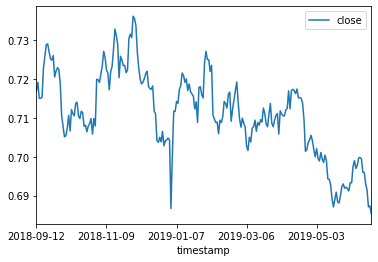

In [9]:

test_df.plot(x="timestamp", 
             y="close")



#### Plot Trade with Candlesticks Chart


In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize = (int(len(test_df.index)/5),10))

fig.suptitle('Algo-Trading Results', fontsize=18, fontweight='bold')
strategy.plot_trade(axs=axs)

fig.savefig('../gen/StrategySV_{}_Daily.png'.format(forex_symbol), dpi=150, bbox_inches="tight")

Plotting 240 results for trade days
HOLD 2018-09-13
LONG 2018-09-12 - 2018-09-14, Profit: $-16.0 (0.0 pips)
HOLD 2018-09-16
HOLD 2018-09-17
HOLD 2018-09-18
HOLD 2018-09-19
SHORT 2018-09-14 - 2018-09-20, Profit: $11.43 (2.7 pips)
HOLD 2018-09-21
HOLD 2018-09-23
LONG 2018-09-20 - 2018-09-24, Profit: $39.19 (5.5 pips)
SHORT 2018-09-24 - 2018-09-25, Profit: $149.29 (16.5 pips)
HOLD 2018-09-26
LONG 2018-09-25 - 2018-09-27, Profit: $-223.76 (-20.8 pips)
HOLD 2018-09-28
SHORT 2018-09-27 - 2018-09-30, Profit: $-85.21 (-6.9 pips)
HOLD 2018-10-01
HOLD 2018-10-02
HOLD 2018-10-03
HOLD 2018-10-04
LONG 2018-09-30 - 2018-10-05, Profit: $-58.53 (-4.3 pips)
HOLD 2018-10-07
SHORT 2018-10-05 - 2018-10-08, Profit: $434.32 (45.0 pips)
LONG 2018-10-08 - 2018-10-09, Profit: $550.09 (56.6 pips)
HOLD 2018-10-10
SHORT 2018-10-09 - 2018-10-11, Profit: $-156.63 (-14.1 pips)
LONG 2018-10-11 - 2018-10-12, Profit: $68.45 (8.4 pips)
HOLD 2018-10-14
SHORT 2018-10-12 - 2018-10-15, Profit: $26.02 (4.2 pips)
HOLD 2018-10